# Partitioning a dataset into training and test data

We've done this before but let's review.  
Make your training set as big as possible while maintaining a representative test set. If you have 1 million samples and two categories, doing a 99:1 train:test split is probably fine

In [1]:
#load the wine dataset
from sklearn import datasets
import pandas as pd

wine_sk = datasets.load_wine()
print wine_sk.keys()
wine_targets = pd.DataFrame(wine_sk['target'],columns = ['target'])
wine_data = pd.DataFrame(wine_sk['data'],columns = wine_sk['feature_names'])
wine= pd.concat([wine_targets,wine_data],axis=1)
wine

['target_names', 'data', 'target', 'DESCR', 'feature_names']


,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,0,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0
6,0,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,0,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,0,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,0,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0


In [3]:
#Partition into a 70:30 train:test split
from sklearn.model_selection import train_test_split

X,y = wine[wine_sk['feature_names']].values,wine[['target']].values

X_train, X_test, y_train, y_test =  train_test_split(X, y, 
                                                     test_size=0.3, 
                                                     random_state=0, 
                                                     stratify=y) 
df_train = pd.DataFrame(X_train,columns=wine_sk['feature_names'])
df_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.400000,0.91,2.05,550.0
1,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.400000,1.25,3.00,1235.0
2,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.700000,1.19,2.71,1285.0
3,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.200000,1.10,2.87,1095.0
4,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695.0
5,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.900000,0.93,3.19,385.0
6,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.700000,0.86,3.02,312.0
7,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.450000,0.75,1.51,650.0
8,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.050000,0.96,2.06,495.0
9,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.060000,0.94,2.44,415.0


# Bringing Features Onto the Same Scale

For many algorithms it is necessary, or simply recommended, to bring features into a similar scale. There are two common ways of doing this: **normalization** and **standardization**.  
The names switch roles in different fields, so watch out for that. In this context we'll refer to them as follows:
* **normalization** rescales a feature between 0 and 1
* **Standardization** rescales a feature such that it's data falls along a standard distribution of mean 0 and standard deviation 1

sklearn implements both of these

In [4]:
#normalizer
from sklearn.preprocessing import MinMaxScaler
#standardizer
from sklearn.preprocessing import StandardScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

stdsc = StandardScaler()
X_train_std = stdsc.fit(X_train).transform(X_train)
X_test_std = stdsc.transform(X_test)

df_train_norm = pd.DataFrame(X_train_norm,columns=wine_sk['feature_names'])
df_train_std = pd.DataFrame(X_train_std,columns=wine_sk['feature_names'])

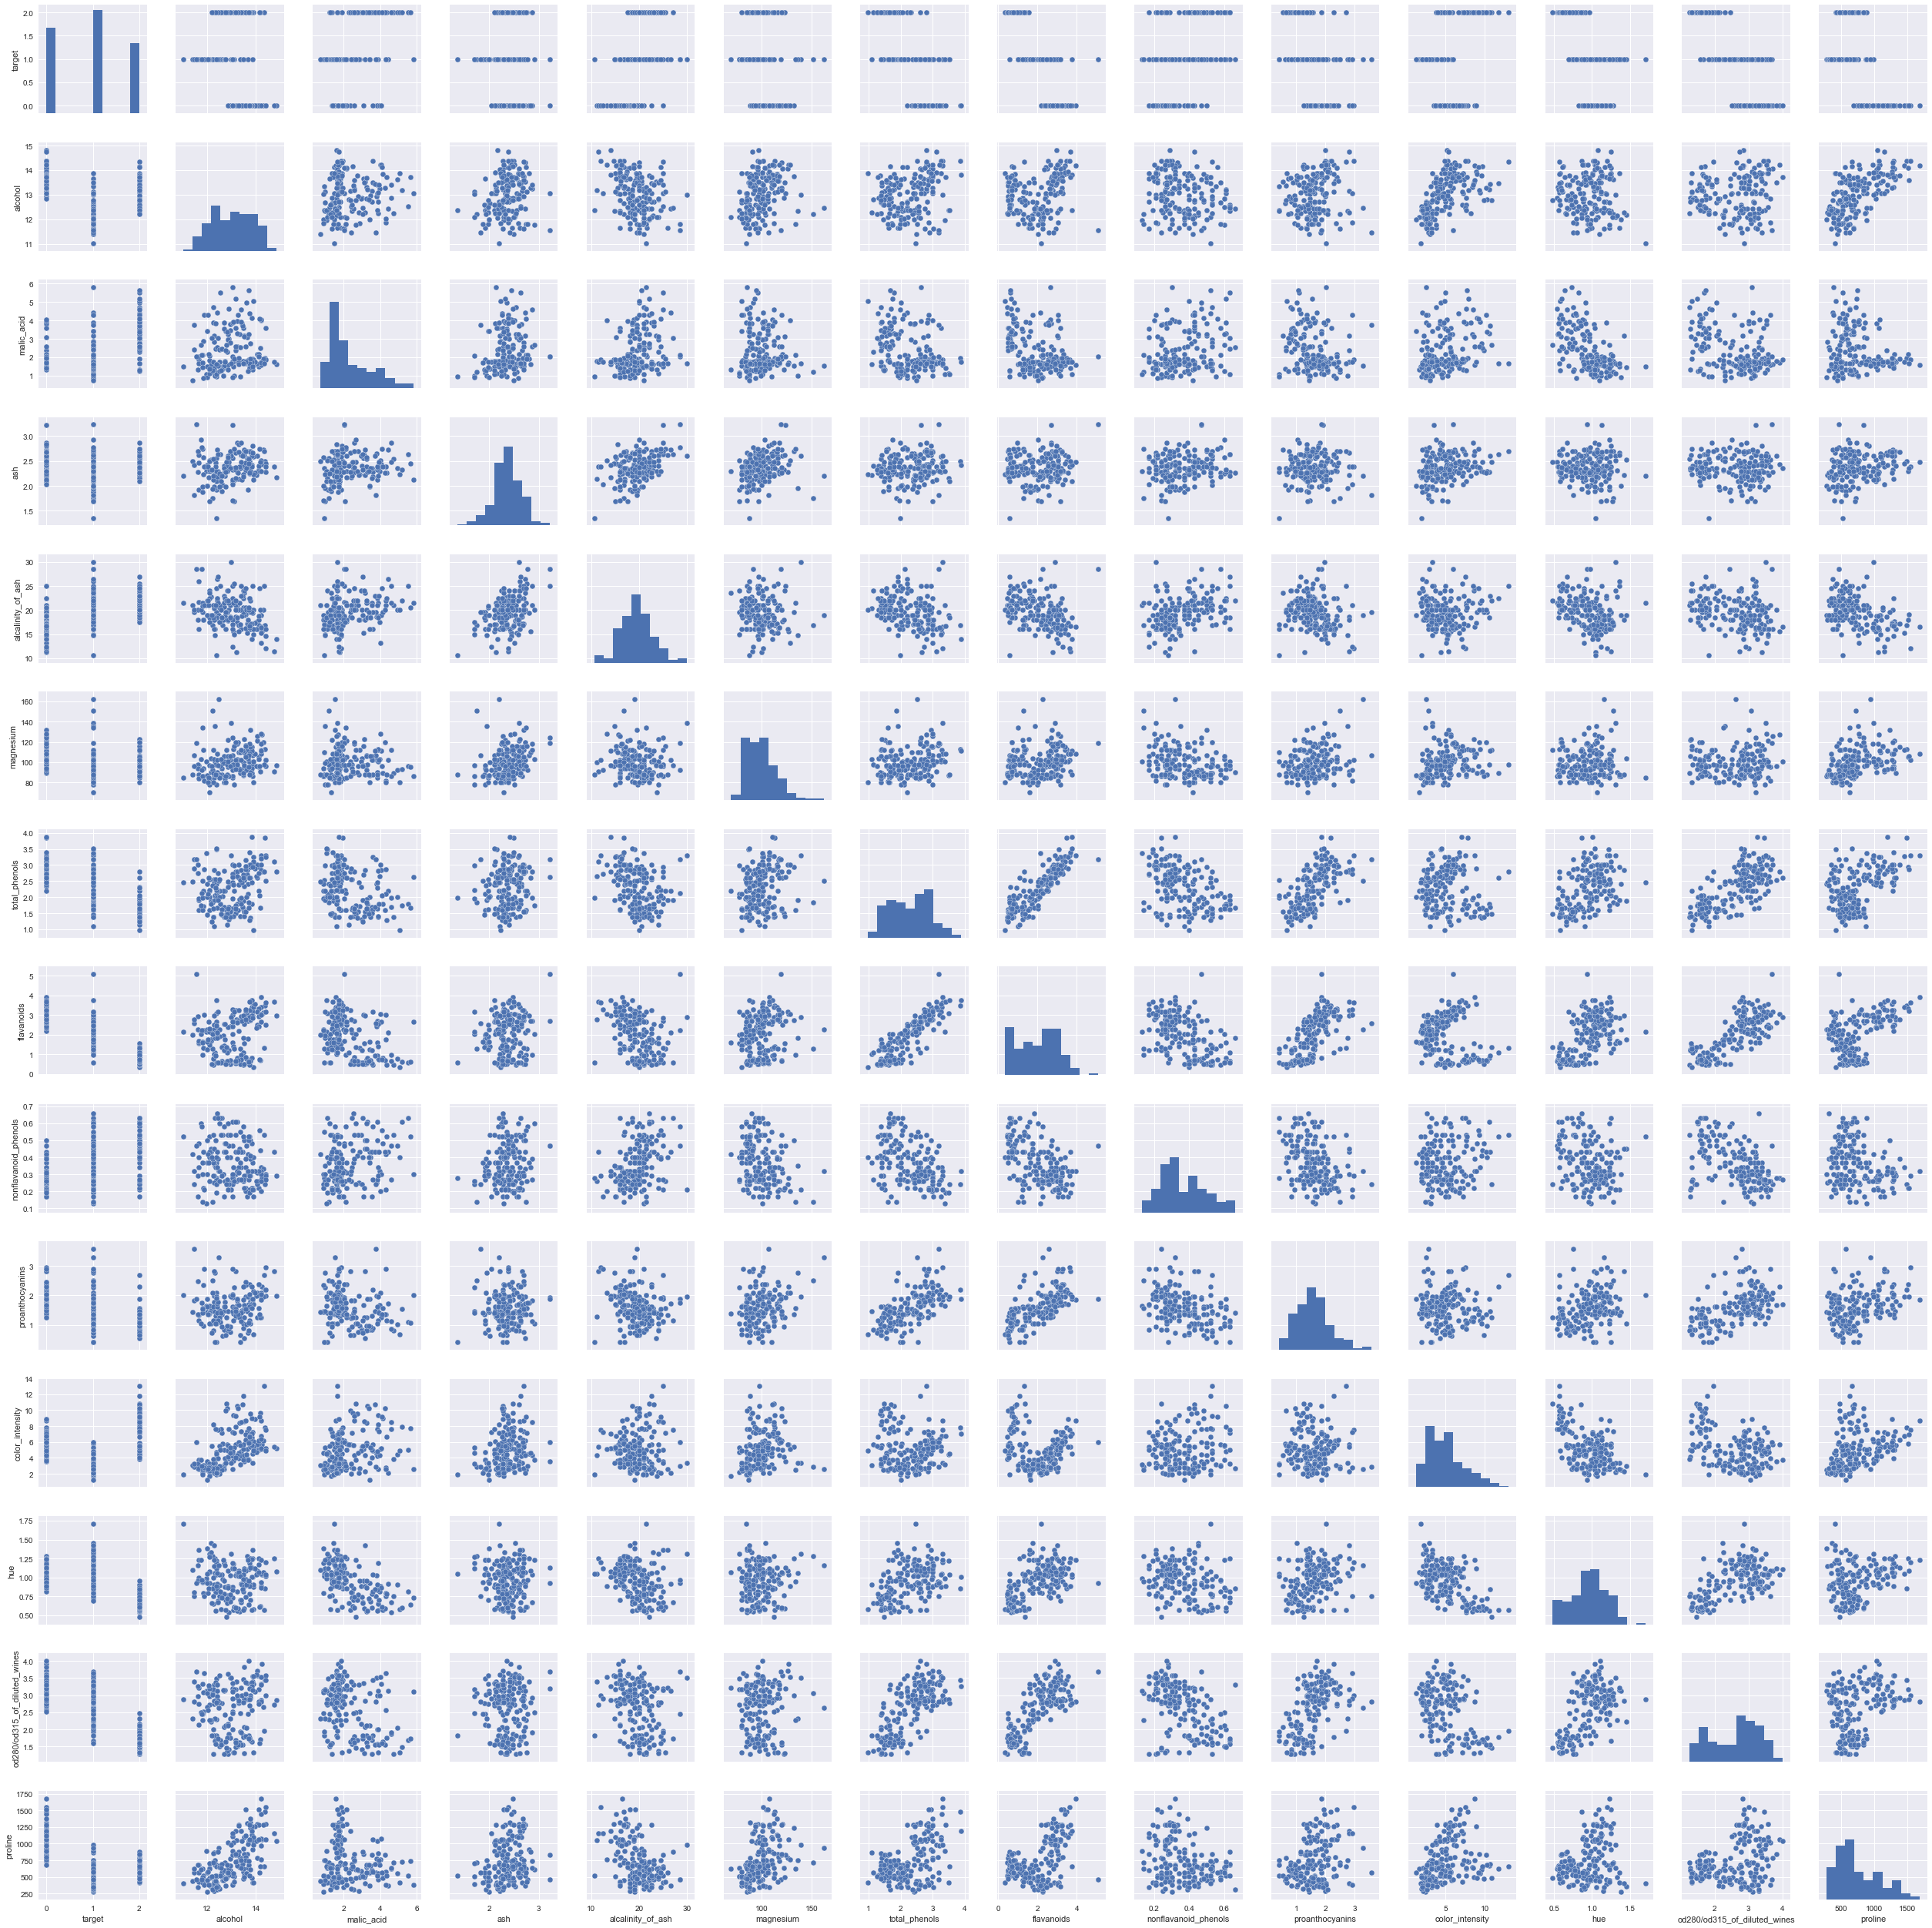

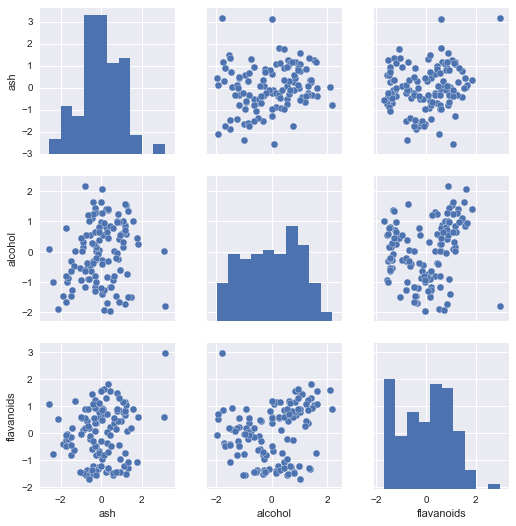

In [22]:
import seaborn as sns; sns.set()
sns.pairplot(wine,color=wine_sk)
sns.pairplot(df_train_std[['ash','alcohol','flavanoids']])

# Selecting Meaningful Features

Having a large amount of features in your dataset can be a boon by providing you with additionall info but it can also be computationally costly and decrease algorithm performance.

I'll show you a few ways of minimizing dimensionality by selecting for meaningful features

## L1 and L2 regularization

We can introduce penalties for large weights or high dimensionality using L1 and L2 regularization. These techniques add an additional cost to regression algorithms based on the shape of the weights vector ***W***



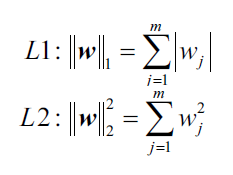

In [6]:
from IPython.display import Image

Image(filename='Images/L1L2.png', width=250)

Above L2 is a cartesian distance in ***W*** space while L1 is somewhat stranger. Below are images of contours displaying the initial cost as well as the added L1 and L2 costs.  
As we can see the L1 regularization encourages a lowered dimensionality by forcing the algorithm to choose weights that predominantly emphasize a given feature. In regression algorithms adding this weight is tantamount to dimensionality reduction.


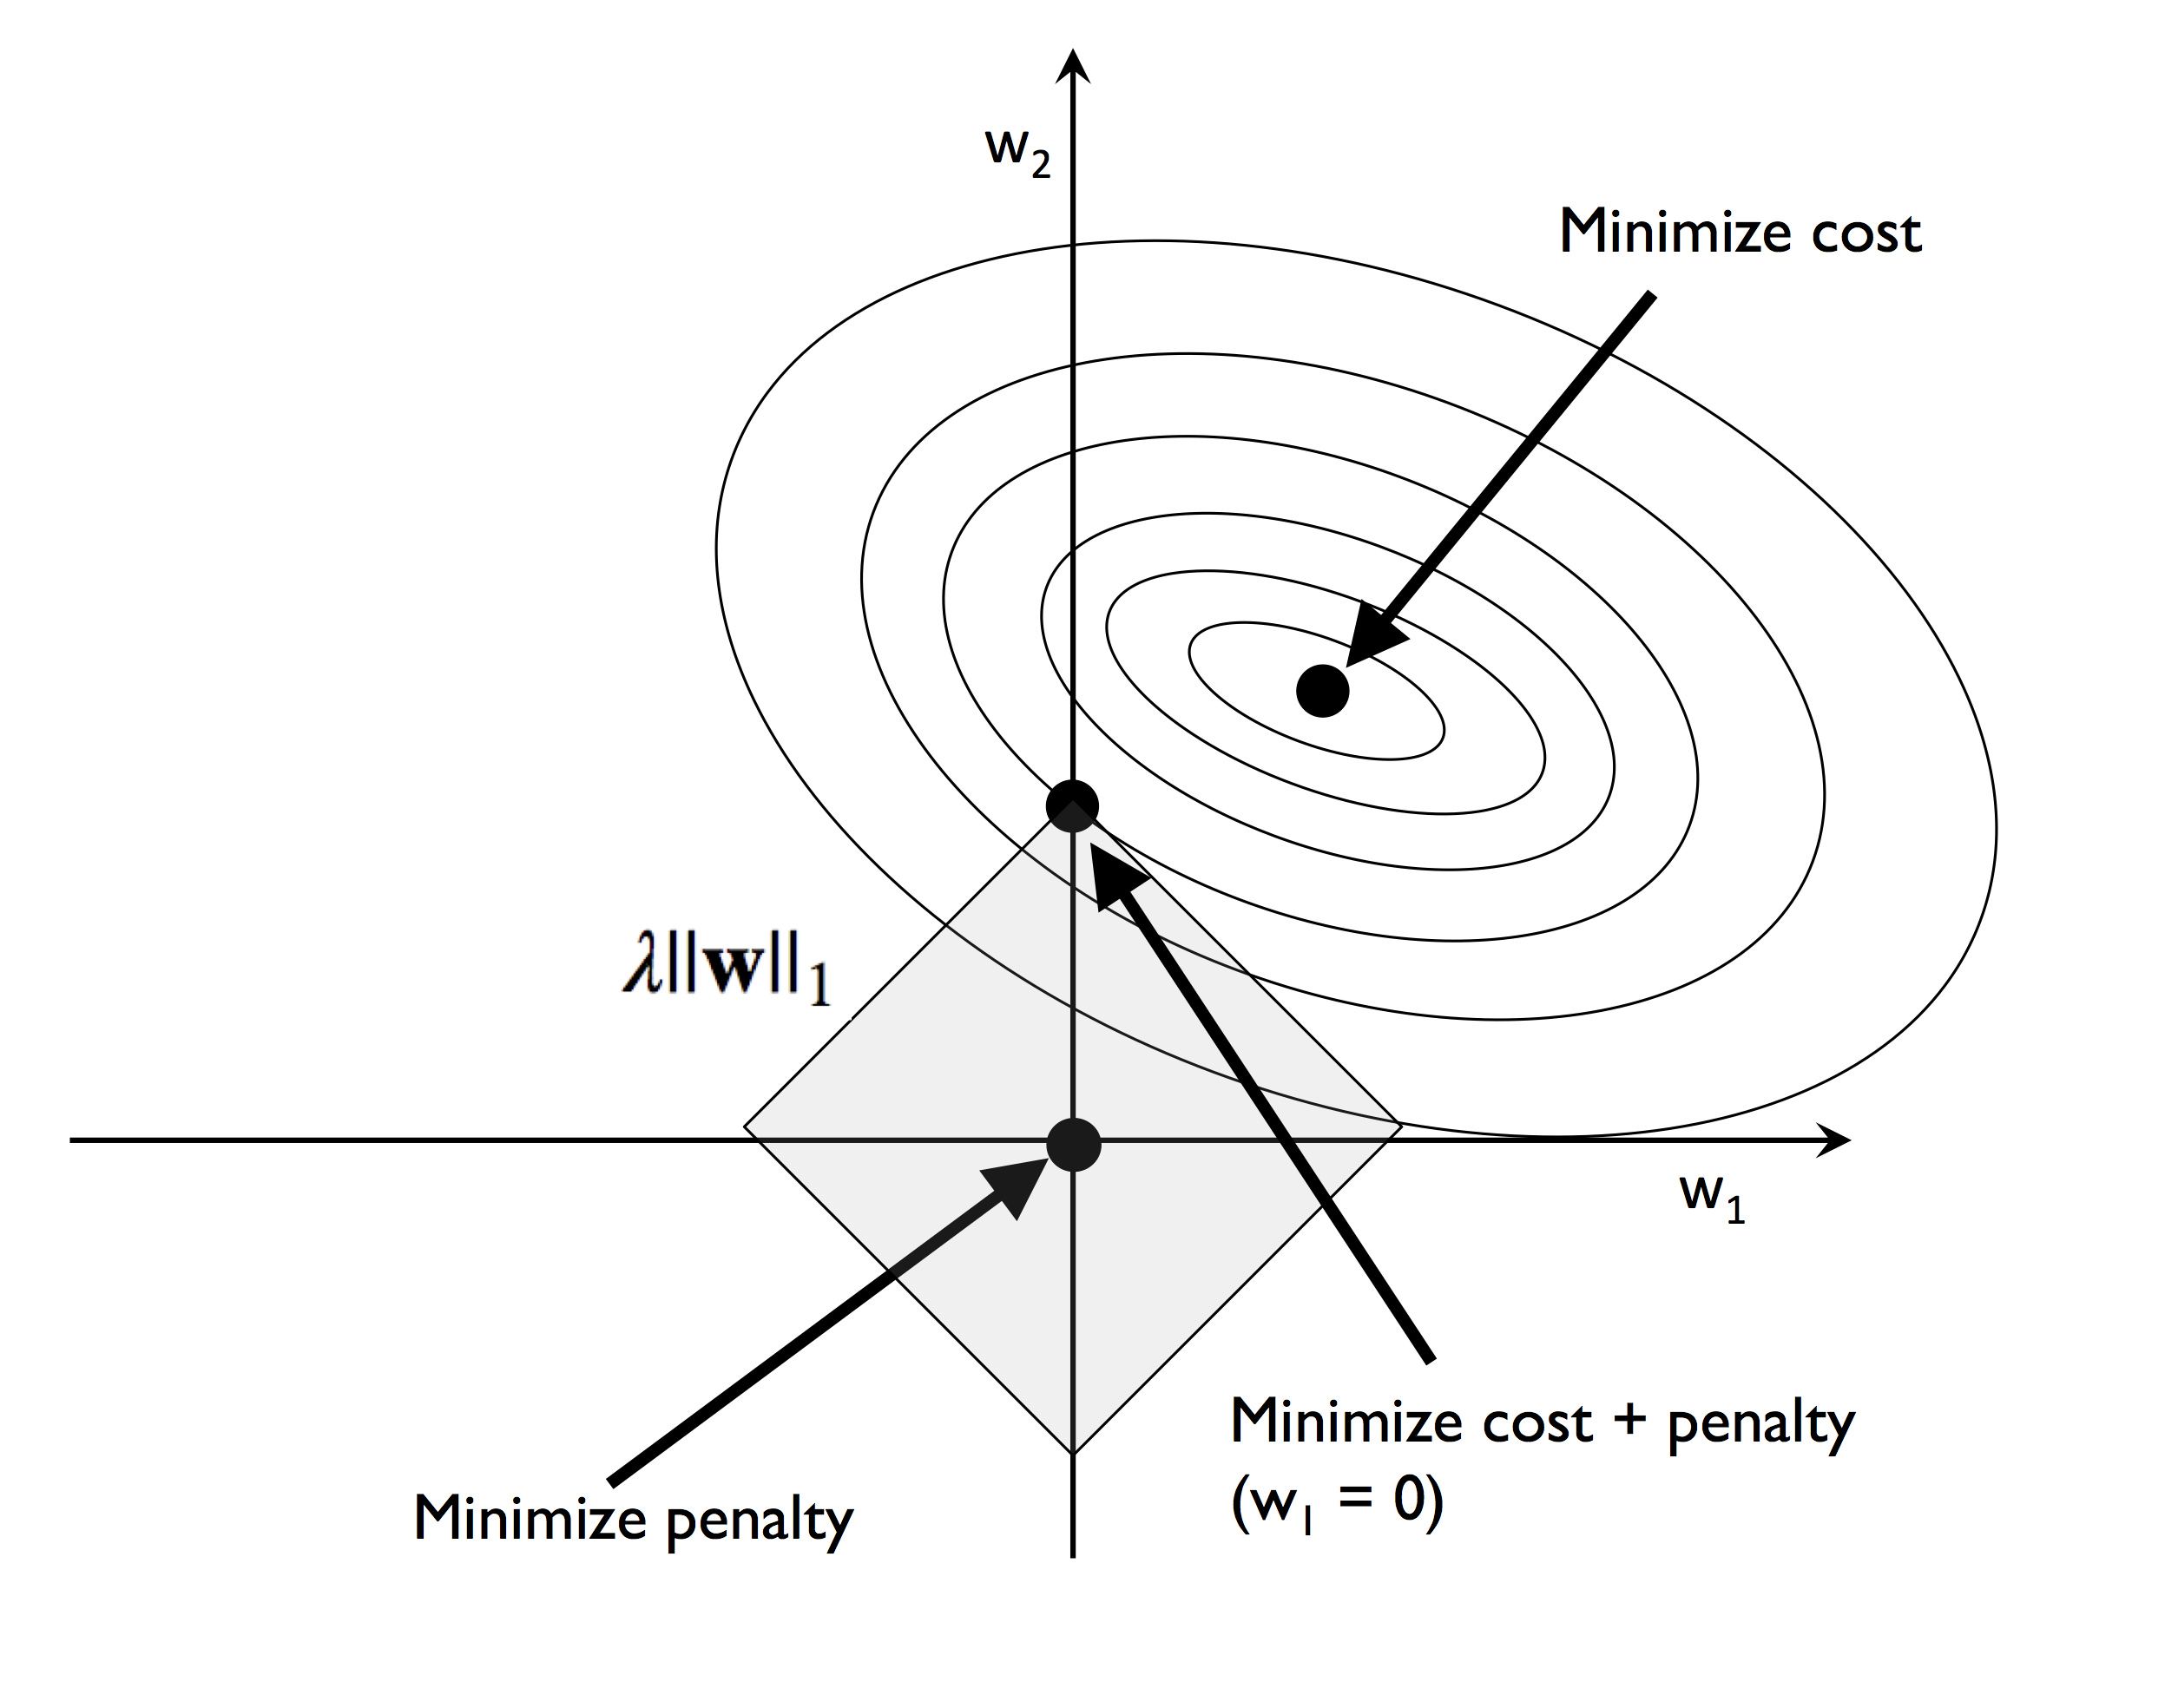

In [8]:

Image(filename='Images/L1_contour.png',width=500)


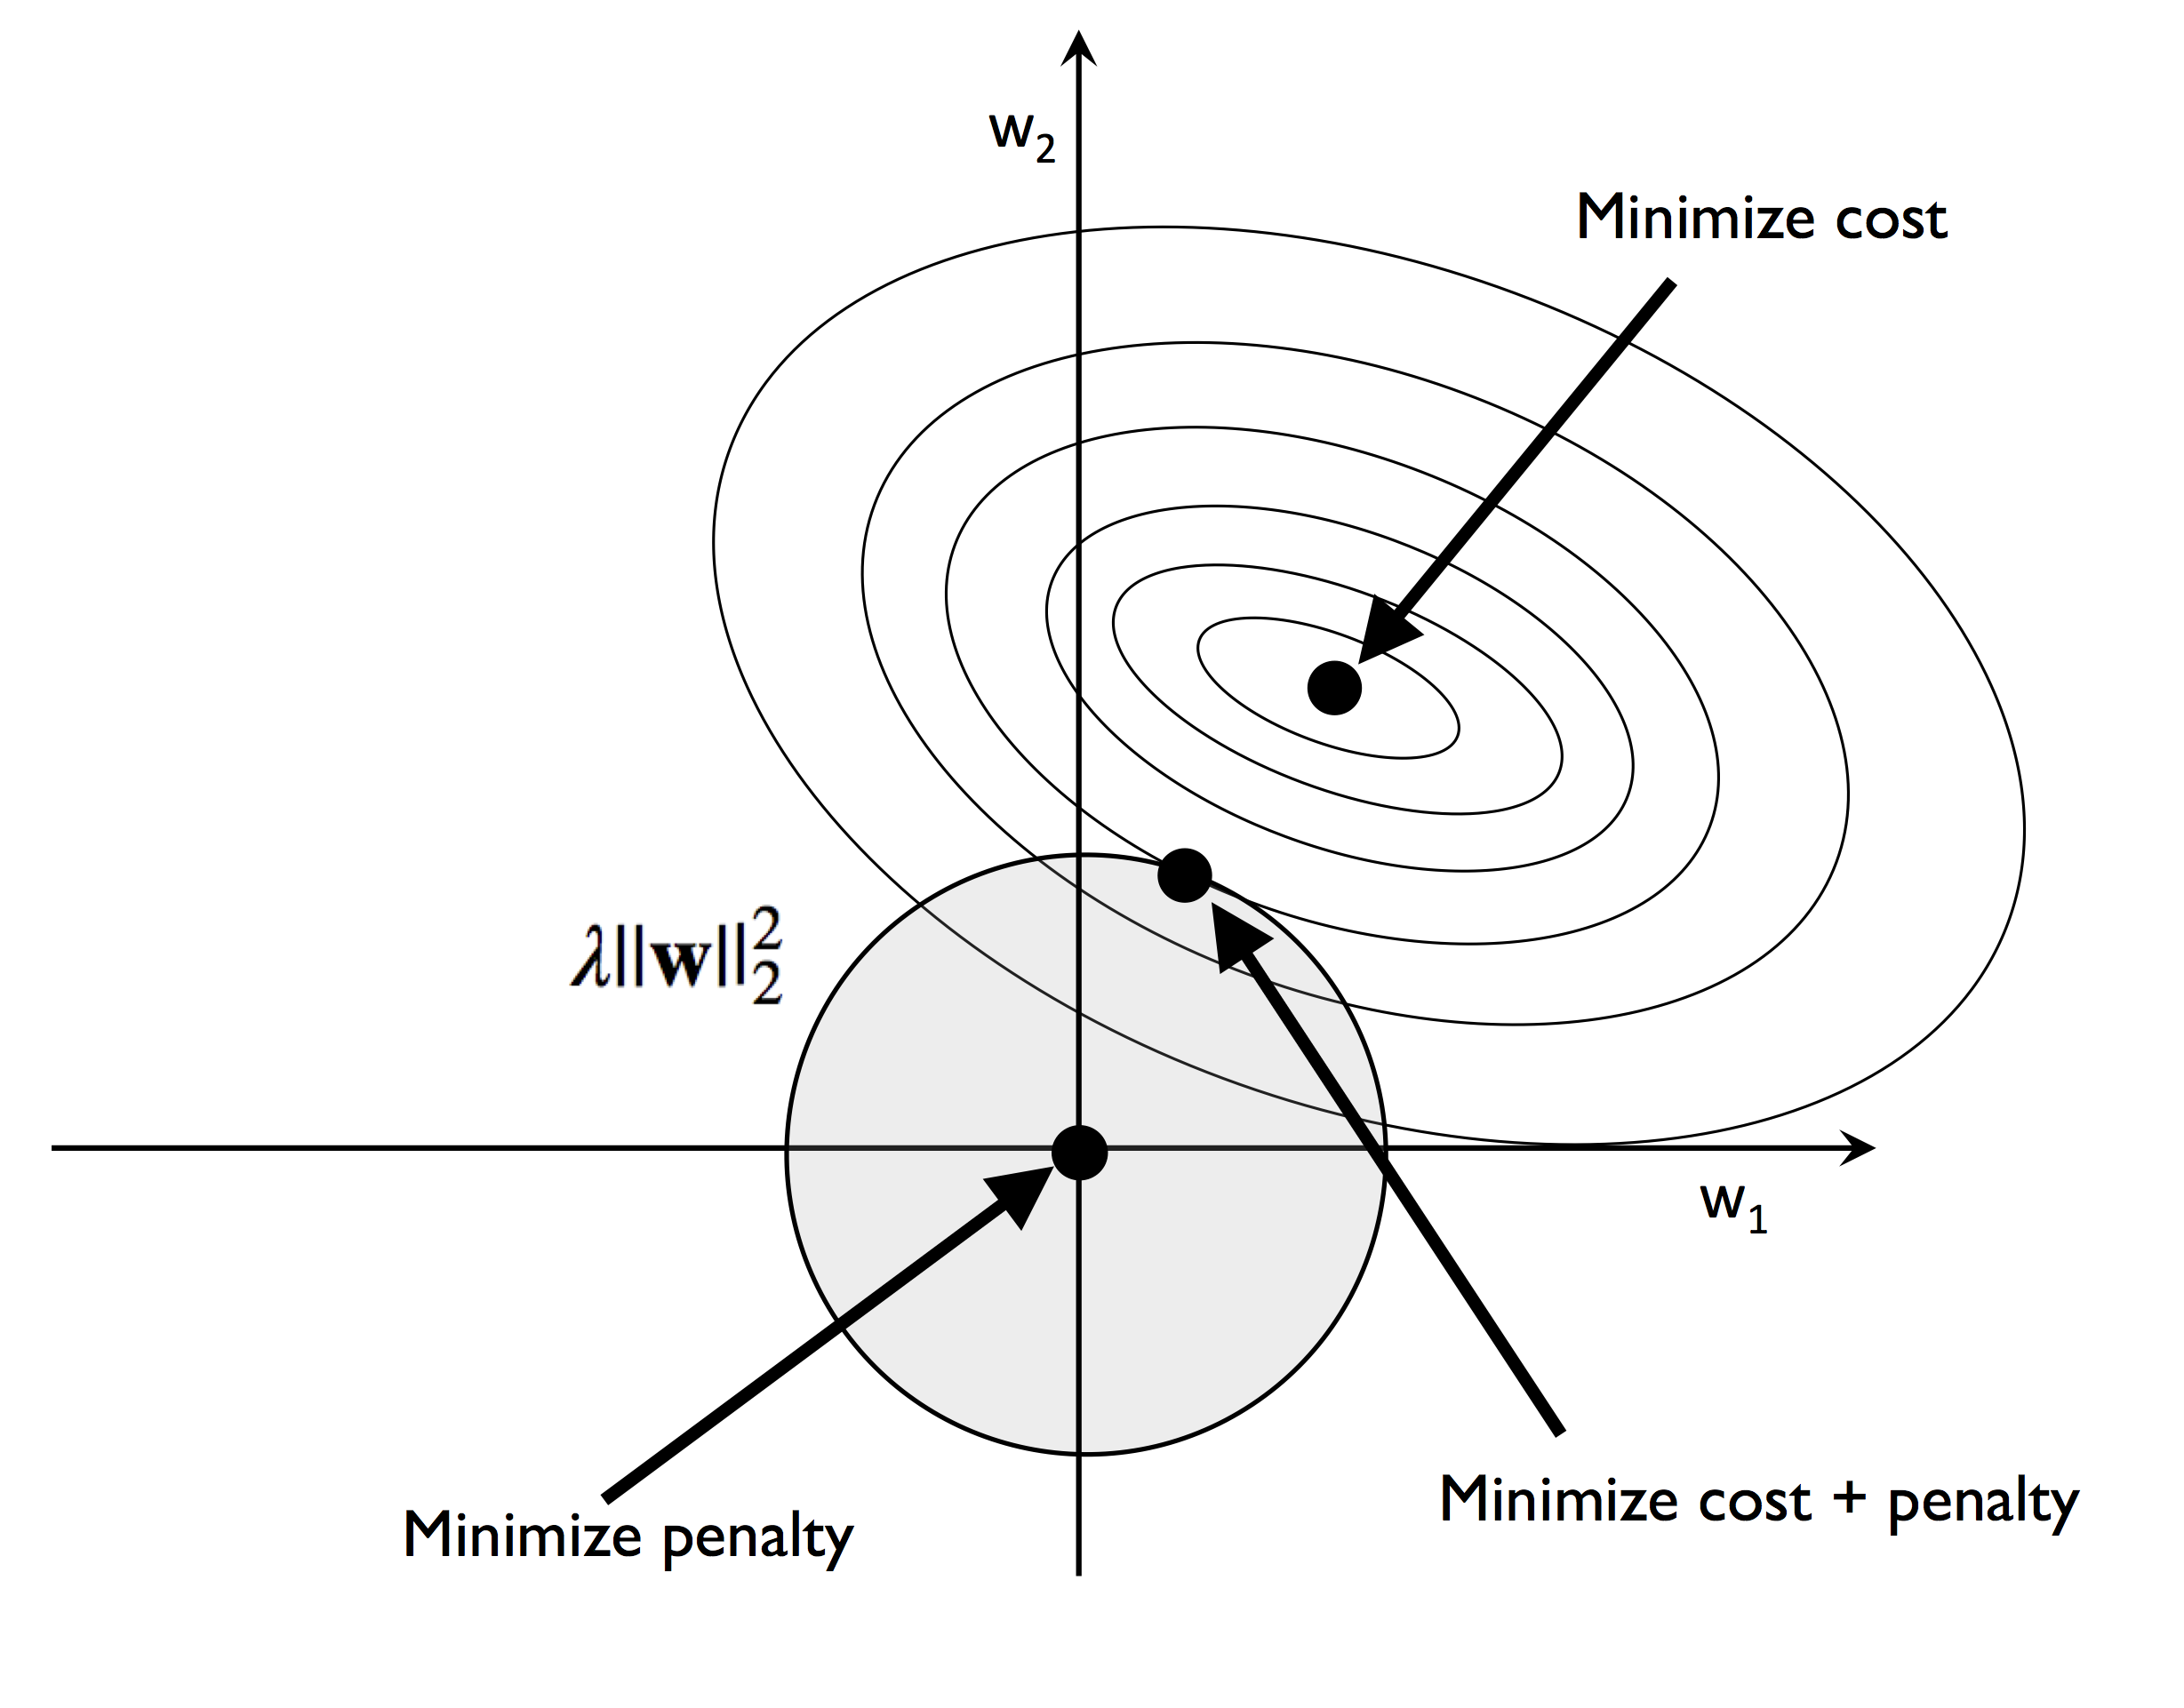

In [10]:
Image(filename='Images/L2_contour.png',width=500)

### A quick example using our regularized wine dataset

In [11]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

('Training accuracy:', 1.0)
('Test accuracy:', 1.0)


C:\Users\Juan\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
import numpy as np
np.set_printoptions(8)

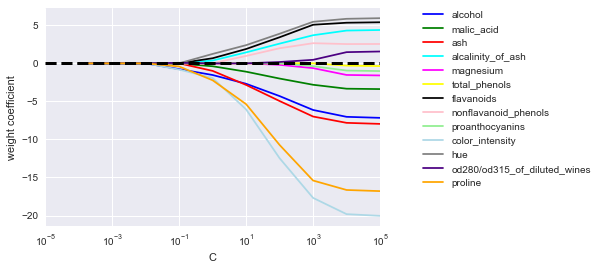

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

the above graphic demonstrates a compression of dimensionallity with an increased regularization parameter, with all of the weights being reduced to 0 if the regularization parameter is too strong

## Sequential Feature Selection
Another method for dimensionality reduction is sequential feature selection. This works by:
* Taking a dataset with *d* features
* Deteriming which feature can be removed with minimal detriment to performance
* Removing that feature
* Repeating until k, the number of features, is equal to the desired k  

Below is the implementation and application of this concept from the book

In [15]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

C:\Users\Juan\Anaconda2\lib\site-packages\ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


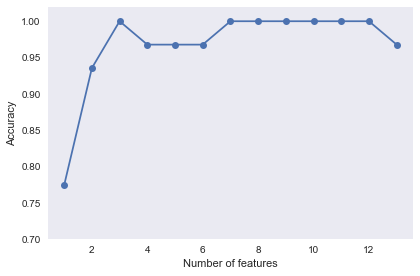

In [16]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

Evidently there are three features or wine that can accurately determine the location where the wine was grown. As seen below they are content of alcohol, malic acid, and whatever od280/od315_of_diluted_wines is

In [17]:
k3 = list(sbs.subsets_[10])
print(wine.columns[1:][k3])

Index([u'alcohol', u'malic_acid', u'od280/od315_of_diluted_wines'], dtype='object')


We can now test our reduced dataset using a KNN algorithm and compare it with a full set

In [18]:
#full set performance
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

('Training accuracy:', 0.967741935483871)
('Test accuracy:', 0.9629629629629629)


C:\Users\Juan\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [19]:
#reduced set performance
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

('Training accuracy:', 0.9516129032258065)
('Test accuracy:', 0.9259259259259259)


C:\Users\Juan\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


we see a small reduction in performance while the size of our dataset has shrunk significantly

In [ ]:
import seaborn as sb
